In [1]:
!pip install qiskit --upgrade
!pip install qiskit-aer
!pip install qiskit-ibm-runtime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 75.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 79.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 94.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 366.2/366.2 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 11.3 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.3
    Uninstalling requests-2.32.3:
      Successfully uninstalled requests-2.32.3
ERROR: pip's dependency resolver does not currently

In [2]:
# outdoor
import numpy as np

def load_data(x_file, y_file):
    # Load train_x data (RSS values) - handling comma-separated values
    with open(x_file, 'r') as f:
        train_x = []
        for line in f:
            # Split line by commas and convert to floats
            rss_values = [float(x) for x in line.strip().split(',')]
            train_x.append(rss_values)
    train_x = np.array(train_x)

    # Load train_y data (locations) - handling comma-separated lat,lng pairs
    with open(y_file, 'r') as f:
        train_y = []
        for line in f:
            # Split line by commas and convert to floats
            lat, lng = map(float, line.strip().split(','))
            train_y.append([lat, lng])
    train_y = np.array(train_y)

    return train_x, train_y

def process_data(train_x, train_y):
    # Step 1: Get distinct points (lat, lng) as tuples
    # We'll use a dictionary to keep track of the first sample for each location
    unique_points_dict = {}
    first_sample_indices = []

    for idx, loc in enumerate(train_y):
        point = tuple(loc)
        if point not in unique_points_dict:
            unique_points_dict[point] = idx
            first_sample_indices.append(idx)

    unique_points = list(unique_points_dict.keys())
    N = len(unique_points)

    # Create a mapping from point to index for quick lookup
    point_to_index = {point: idx for idx, point in enumerate(unique_points)}

    # Step 2: Create dictionary for APs
    num_aps = train_x.shape[1]
    access_points = {}

    # For each AP, create a binary list of size N
    for ap_id in range(num_aps):
        binary_list = [0] * N

        # Only consider the first sample for each unique location
        for sample_idx in first_sample_indices:
            rss = train_x[sample_idx, ap_id]
            if rss >= -100:
                point = tuple(train_y[sample_idx])
                point_idx = point_to_index[point]
                binary_list[point_idx] = 1

        access_points[ap_id] = binary_list

    return unique_points, access_points

# Main execution
if __name__ == "__main__":
    train_x_file = "train_x.txt"
    train_y_file = "train_y.txt"

    # Load data
    train_x, train_y = load_data(train_x_file, train_y_file)

    # Verify data shapes
    print(f"Train X shape: {train_x.shape}")
    print(f"Train Y shape: {train_y.shape}")
    print(f"Number of samples: {len(train_x)}")

    # Process data
    points, access_points = process_data(train_x, train_y)

    # Print results
    print("\nNumber of unique points:", len(points))
    print("\nFirst 5 Unique Points (lat, lng):")
    for i, point in enumerate(points[:5]):
        print(f"{i}: {point}")

    print("\nAccess Points Coverage (first 5 APs):")
    for ap_id, coverage in list(access_points.items())[:5]:
        print(f"AP {ap_id}: {coverage}")

Train X shape: (5500, 21)
Train Y shape: (5500, 2)
Number of samples: 5500

Number of unique points: 11

First 5 Unique Points (lat, lng):
0: (np.float64(31.265377), np.float64(30.003767))
1: (np.float64(31.264477), np.float64(30.004704))
2: (np.float64(31.26485), np.float64(30.004092))
3: (np.float64(31.265127), np.float64(30.003481))
4: (np.float64(31.265482), np.float64(30.002833))

Access Points Coverage (first 5 APs):
AP 0: [1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1]
AP 1: [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1]
AP 2: [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1]
AP 3: [1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1]
AP 4: [1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1]


In [3]:
def generate_sequences(M, points, access_points):
    """
    Generate sequences of AP coverage for sliding windows of size M.

    Args:
        M (int): Window size for sequences
        points (list): List of unique (lat, lng) points
        access_points (dict): Dictionary mapping AP IDs to binary coverage lists

    Returns:
        tuple: (sequences, ground_truth)
            sequences: List of dictionaries with AP coverage for each window
            ground_truth: List of ground truth locations for each window
    """
    N = len(points)
    sequences = []
    ground_truth = []

    # Get all AP IDs from the access_points dictionary
    ap_ids = list(access_points.keys())

    # Generate sequences for each window of size M
    for i in range(N - M + 1):
        window_points = points[i:i+M]
        window_gt = window_points[0]  # Ground truth is the last point in window. xxxx i or -1
        ground_truth.append(window_gt)

        # Create dictionary for this window's AP coverage
        window_aps = {}

        for ap_id in ap_ids:
            # Get coverage for this AP across all points in window
            coverage = [access_points[ap_id][i + j] for j in range(M)]

            # Only include APs that were heard at least once in the window
            if any(coverage):
                window_aps[ap_id] = coverage

        sequences.append(window_aps)

    return sequences, ground_truth

# Example usage with your data:
if __name__ == "__main__":
    # Assuming you have already loaded points and access_points
    # from the previous code
    M = 3
    sequences, ground_truth = generate_sequences(M, points, access_points)

    print(f"Total sequences of length {M}: {len(sequences)}")
    print("\nFirst sequence:")
    print("APs and their presence:", sequences[0])
    print("Ground truth point:", ground_truth[0])

Total sequences of length 3: 9

First sequence:
APs and their presence: {0: [1, 1, 1], 1: [1, 1, 1], 3: [1, 1, 1], 4: [1, 1, 1], 6: [0, 0, 1], 7: [1, 1, 0], 12: [1, 1, 0], 14: [0, 0, 1], 17: [0, 0, 1], 18: [1, 1, 0]}
Ground truth point: (np.float64(31.265377), np.float64(30.003767))


Train X shape: (5500, 21)
Train Y shape: (5500, 2)
Number of samples: 5500


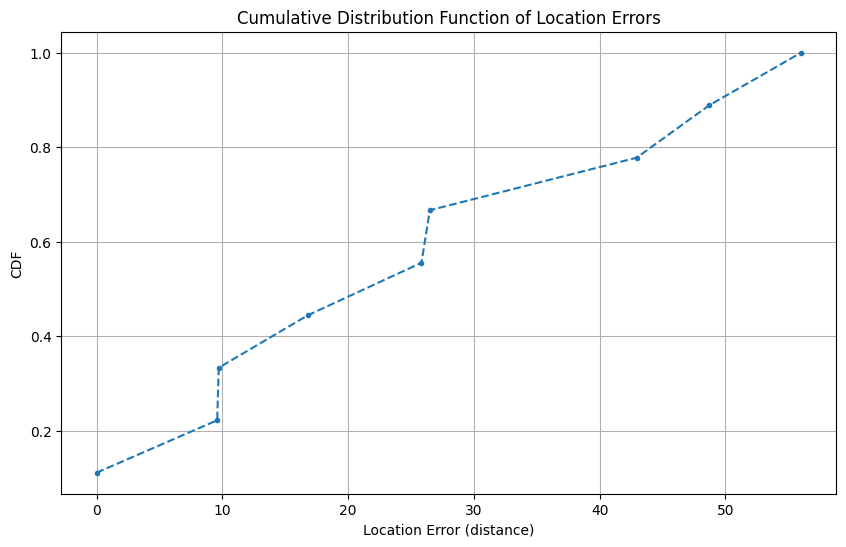

Total sequences: 9
Mean error: 26.23 units
Median error: 25.84 units
Max error: 56.01 units


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
import math
from math import radians, sin, cos, sqrt, atan2


def classical_estimate_location(sequence, access_points, points, M, T=0):
    """
    Classical pattern matching with Hamming distance threshold T
    Returns the estimated location by averaging all matching positions
    """
    estimated_locations = []

    for ap_id, pattern in sequence.items():
        ap_estimated_locations = []
        full_list = access_points[ap_id]
        N = len(full_list)
        matches = []

        for i in range(N - M + 1):
          hamming_dist = sum(full_list[i + j] != pattern[j] for j in range(M))
          if hamming_dist <= T:
            matches.append(i)
            # estimated_locations.append(points[i])
            ap_estimated_locations.append((points[i], 1/(hamming_dist+.00001)))

        max_tuple = max(ap_estimated_locations, key=lambda item: item[1])
        estimated_locations.append(max_tuple) # ThINK ABOUT THE SEQUENCE LENGTH, M, N, 1, K 1->INF
            # break   # xxxxxxx


    # Average all AP estimates
    total_prob = sum(prob for _, prob in estimated_locations)
    final_x = sum(p[0]* prob for p,prob in estimated_locations) / total_prob
    final_y = sum(p[1]*prob for p,prob in estimated_locations) / total_prob

    # total_prob = sum(prob for _, prob in estimated_locations)
    # avg_x = sum(p[0]*prob for p, prob in estimated_locations) / total_prob # xxxxxxxx
    # avg_y = sum(p[1]*prob for p, prob in estimated_locations) / total_prob # xxxxxxxx

    return (final_x, final_y)

def calculate_distance(p1, p2):
    return sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def haversine_distance(point1, point2):
    """
    Calculate the great-circle distance (in meters) between two GPS points using the Haversine formula.

    Args:
        point1 (tuple): (latitude, longitude) of first point in degrees
        point2 (tuple): (latitude, longitude) of second point in degrees

    Returns:
        float: Distance in meters
    """
    lat1, lon1 = point1
    lat2, lon2 = point2

    # Convert degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    # Earth radius in meters (mean radius = 6371 km)
    R = 6371e3  # 6371 km * 1000 m/km

    distance = R * c
    return distance


def plot_cdf(errors):
    sorted_errors = np.sort(errors)
    cdf = np.arange(1, len(sorted_errors)+1) / len(sorted_errors)

    plt.figure(figsize=(10, 6))
    plt.plot(sorted_errors, cdf, marker='.', linestyle='--')
    plt.xlabel('Location Error (distance)')
    plt.ylabel('CDF')
    plt.title('Cumulative Distribution Function of Location Errors')
    plt.grid(True)
    plt.show()

def main():
    M = 3  # Sequence length
    T = 0.0
    # file_path = 'indoor_avg.txt'

    # Parse the data
    # points, access_points = parse_wifi_data(file_path)
    train_x_file = "train_x.txt"
    train_y_file = "train_y.txt"

    # Load data
    train_x, train_y = load_data(train_x_file, train_y_file)

    # Verify data shapes
    print(f"Train X shape: {train_x.shape}")
    print(f"Train Y shape: {train_y.shape}")
    print(f"Number of samples: {len(train_x)}")

    # Process data
    points, access_points = process_data(train_x, train_y)

    # Generate sequences
    sequences, ground_truth = generate_sequences(M, points, access_points) #generate_sequences(M)

    # Estimate locations and calculate errors
    errors = []
    for seq, truth in zip(sequences, ground_truth):
        estimated_loc = classical_estimate_location(seq, access_points, points, M, T=T)
        if estimated_loc:
            error = haversine_distance(estimated_loc, truth)
            errors.append(error)

    # Plot CDF
    plot_cdf(errors)

    # Print some statistics
    print(f"Total sequences: {len(sequences)}")
    print(f"Mean error: {np.mean(errors):.2f} units")
    print(f"Median error: {np.median(errors):.2f} units")
    print(f"Max error: {np.max(errors):.2f} units")

if __name__ == "__main__":
    main()

*Quantum* full simulator

Train X shape: (5500, 21)
Train Y shape: (5500, 2)
Number of samples: 5500
Processing sequence 1


/tmp/ipython-input-172503682.py:53: DeprecationWarning: The class ``qiskit.circuit.library.generalized_gates.diagonal.Diagonal`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use DiagonalGate instead.
  oracle = Diagonal(diagonal)
/tmp/ipython-input-172503682.py:53: DeprecationWarning: The class ``qiskit.circuit.library.generalized_gates.diagonal.Diagonal`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use DiagonalGate instead.
  oracle = Diagonal(diagonal)


Estimated: (np.float64(31.26489509090909), np.float64(30.003501181818184)), Truth: (np.float64(31.265377), np.float64(30.003767)), Error: 59.24
Processing sequence 2
Estimated: (np.float64(31.264632124999995), np.float64(30.004510416666665)), Truth: (np.float64(31.264477), np.float64(30.004704)), Error: 25.22
Processing sequence 3
Estimated: (np.float64(31.26487088461539), np.float64(30.003912461538462)), Truth: (np.float64(31.26485), np.float64(30.004092)), Error: 17.22
Processing sequence 4
Estimated: (np.float64(31.265132500000004), np.float64(30.003401900000007)), Truth: (np.float64(31.265127), np.float64(30.003481)), Error: 7.54
Processing sequence 5
Estimated: (np.float64(31.265370600000004), np.float64(30.002887366666666)), Truth: (np.float64(31.265482), np.float64(30.002833)), Error: 13.42
Processing sequence 6
Estimated: (np.float64(31.264841321428573), np.float64(30.001976678571427)), Truth: (np.float64(31.264859), np.float64(30.001793)), Error: 17.57
Processing sequence 7
Es

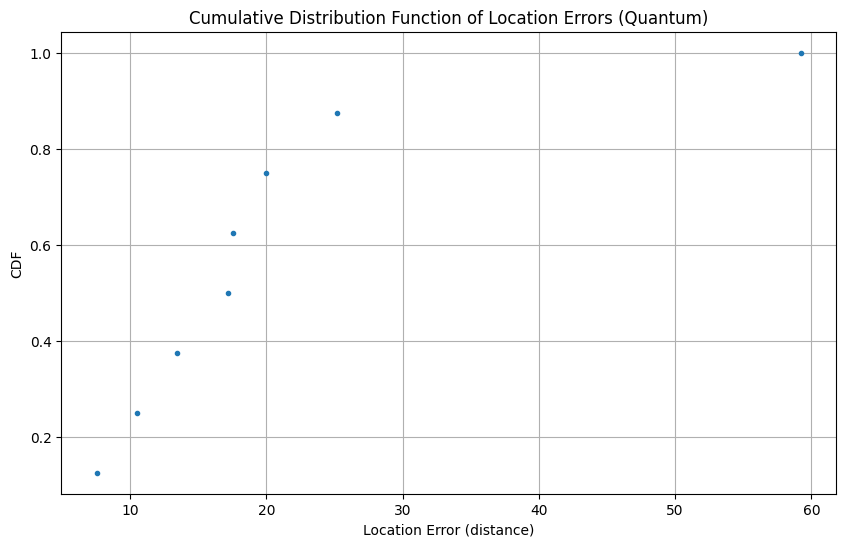


Statistics for first 8 sequences:
Mean error: 21.35 units
Median error: 17.40 units
Max error: 59.24 units


In [5]:

import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, log2, ceil
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import Diagonal

def grover_pattern_match(pattern, full_list, T=0, shots=2):
    """
    Quantum pattern matching using Grover's algorithm with classical oracle
    that flips phase of states with Hamming distance <= T.
    """


    N = len(full_list)
    M = len(pattern)

    if (M < T): T = M

    # Number of qubits needed for indices (0 to N-M)
    n_index = ceil(log2(N - M + 1)) if N > M else 1

    # Create quantum circuit
    qc = QuantumCircuit(n_index, n_index)

    # Initialize superposition of indices
    qc.h(range(n_index))

    # Number of Grover iterations
    # num_solutions = len([i for i in range(N - M + 1)
                      # if sum(full_list[i + j] != pattern[j] for j in range(M)) <= T])

    # Precompute which states should have phase flipped
    num_solutions = 0
    phase_flip_indices = []
    for i in range(N - M + 1):
        hamming_dist = sum(full_list[i + j] != pattern[j] for j in range(M))
        if hamming_dist <= T:
            phase_flip_indices.append(i)
            num_solutions += 1

    num_iterations = int(np.pi/4 * np.sqrt((2**n_index)/num_solutions)) if num_solutions > 0 else 0
    # Create diagonal unitary for phase flips
    diagonal = np.ones(2**n_index)
    for idx in phase_flip_indices:
        if idx < 2**n_index:
            diagonal[idx] = -1

    # Grover iterations
    for _ in range(num_iterations):
        # Oracle
        oracle = Diagonal(diagonal)
        qc.append(oracle, range(n_index))

        # Diffusion operator
        qc.h(range(n_index))
        qc.x(range(n_index))
        qc.h(n_index - 1)
        qc.mcx(list(range(n_index - 1)), n_index - 1)
        qc.h(n_index - 1)
        qc.x(range(n_index))
        qc.h(range(n_index))

    # Measure the index qubits
    qc.measure(range(n_index), range(n_index))

    # Execute the circuit
    backend = Aer.get_backend('qasm_simulator')
    compiled_circuit = transpile(qc, backend)
    result = backend.run(compiled_circuit, shots=shots).result()
    counts = result.get_counts()

    # Process results
    matches = []
    for idx_str, count in counts.items():
        idx = int(idx_str, 2)
        if idx < N - M + 1:
            matches.append((idx, count/shots))

    return sorted(matches, key=lambda x: -x[1])

def quantum_estimate_location(sequence, access_points, points, M, T=0):
    estimated_locations = []

    for ap_id, pattern in sequence.items():
        full_list = access_points[ap_id]
        matches = grover_pattern_match(pattern, full_list, T)

        for match_idx, prob in matches:
            if prob > 0.0:  # Only consider matches with significant probability.  xxxxxxxx prob > 0.1
                estimated_locations.append((points[match_idx], prob))
                # break

    if not estimated_locations:
        return None

    # Weighted average based on probabilities
    total_prob = sum(prob for _, prob in estimated_locations)
    avg_x = sum(p[0]*prob for p, prob in estimated_locations) / total_prob # xxxxxxxx
    avg_y = sum(p[1]*prob for p, prob in estimated_locations) / total_prob # xxxxxxxx
    # p , _ = estimated_locations[1]
    # avg_x = p[0]
    # avg_y = p[1]
    # avg_x = (estimated_locations[0])[0]
    # avg_y = (estimated_locations[0])[1]


    # avg_x = sum(p[0] for p, prob in estimated_locations) / len(estimated_locations)
    # avg_y = sum(p[1] for p, prob in estimated_locations) / len(estimated_locations)

    return (avg_x, avg_y)

def plot_cdf(errors):
    sorted_errors = np.sort(errors)
    cdf = np.arange(1, len(sorted_errors)+1) / len(sorted_errors)

    plt.figure(figsize=(10, 6))
    plt.plot(sorted_errors, cdf, marker='.', linestyle='none')
    plt.xlabel('Location Error (distance)')
    plt.ylabel('CDF')
    plt.title('Cumulative Distribution Function of Location Errors (Quantum)')
    plt.grid(True)
    plt.show()

def main():
    M = 4  # Sequence length
    T = 0.0   # Matching threshold
    train_x_file = "train_x.txt"
    train_y_file = "train_y.txt"

    # Load data
    train_x, train_y = load_data(train_x_file, train_y_file)

    # Verify data shapes
    print(f"Train X shape: {train_x.shape}")
    print(f"Train Y shape: {train_y.shape}")
    print(f"Number of samples: {len(train_x)}")

    # Process data
    points, access_points = process_data(train_x, train_y)

    # Generate sequences
    sequences, ground_truth = generate_sequences(M, points, access_points) #generate_sequences(M)


    # Estimate locations using quantum search and calculate errors
    errors = []
    for seq, truth in zip(sequences[:], ground_truth[:]):  # Just do first 10 for demo
        print(f"Processing sequence {len(errors)+1}")
        estimated_loc = quantum_estimate_location(seq, access_points, points, M, T)
        if estimated_loc:
            error = haversine_distance(estimated_loc, truth)
            errors.append(error)
            print(f"Estimated: {estimated_loc}, Truth: {truth}, Error: {error:.2f}")

    # Plot CDF
    plot_cdf(errors)

    # Print some statistics
    if errors:
        print(f"\nStatistics for first {len(errors)} sequences:")
        print(f"Mean error: {np.mean(errors):.2f} units")
        print(f"Median error: {np.median(errors):.2f} units")
        print(f"Max error: {np.max(errors):.2f} units")
    else:
        print("No valid matches found")

if __name__ == "__main__":
    main()

Train X shape: (5500, 21)
Train Y shape: (5500, 2)
Number of samples: 5500


/tmp/ipython-input-172503682.py:53: DeprecationWarning: The class ``qiskit.circuit.library.generalized_gates.diagonal.Diagonal`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use DiagonalGate instead.
  oracle = Diagonal(diagonal)


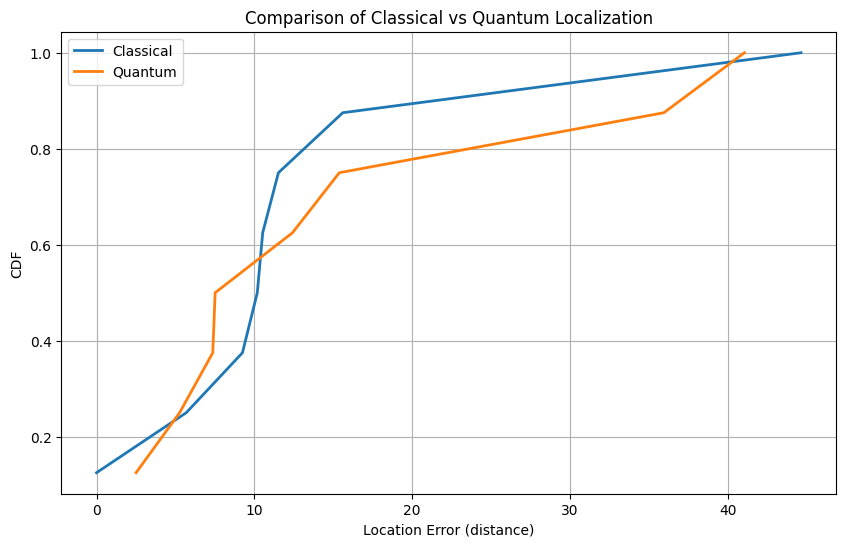

Classical Stats:
Mean error: 13.43, Median: 10.36

Quantum Stats:
Mean error: 15.94, Median: 9.97


In [7]:
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

def plot_combined_cdf(classical_errors, quantum_errors):
    """
    Plot CDFs for both classical and quantum localization errors
    """
    plt.figure(figsize=(10, 6))

    # Classical CDF
    sorted_classical = np.sort(classical_errors)
    cdf_classical = np.arange(1, len(sorted_classical)+1) / len(sorted_classical)
    plt.plot(sorted_classical, cdf_classical, label='Classical', linewidth=2)

    # Quantum CDF
    sorted_quantum = np.sort(quantum_errors)
    cdf_quantum = np.arange(1, len(sorted_quantum)+1) / len(sorted_quantum)
    plt.plot(sorted_quantum, cdf_quantum, label='Quantum', linewidth=2)

    plt.xlabel('Location Error (distance)')
    plt.ylabel('CDF')
    plt.title('Comparison of Classical vs Quantum Localization')
    plt.legend()
    plt.grid(True)
    plt.show()



# IBM_TOKEN = "not_needed_for_fake_backend"  # Fake backend doesn't need real token
# IBM_INSTANCE = "not_needed"
# aer_sim = get_noisy_aer_simulator(IBM_TOKEN, IBM_INSTANCE, "ibm_brisbane")

M = 4  # Sequence length
T = 0.0   # Matching threshold
train_x_file = "train_x.txt"
train_y_file = "train_y.txt"

# Load data
train_x, train_y = load_data(train_x_file, train_y_file)

# Verify data shapes
print(f"Train X shape: {train_x.shape}")
print(f"Train Y shape: {train_y.shape}")
print(f"Number of samples: {len(train_x)}")

# Process data
points, access_points = process_data(train_x, train_y)

# Generate sequences
sequences, ground_truth = generate_sequences(M, points, access_points) #generate_sequences(M)

# Limit to first 20 sequences for demonstration
sequences = sequences[:]
ground_truth = ground_truth[:]

# Classical localization
classical_errors = []
for seq, truth in zip(sequences, ground_truth):
        estimated_loc = classical_estimate_location(seq, access_points, points, M, T)
        if estimated_loc:
            error = haversine_distance(estimated_loc, truth)
            classical_errors.append(error)

    # Quantum localization
quantum_errors = []
for seq, truth in zip(sequences, ground_truth):
        # estimated_loc = quantum_estimate_location(seq, access_points, points, M, T)
        estimated_loc = quantum_estimate_location(seq, access_points, points, M, T)
        if estimated_loc:
            error = haversine_distance(estimated_loc, truth)
            quantum_errors.append(error)

# Plot combined CDF
plot_combined_cdf(classical_errors, quantum_errors)

# Print statistics
print("Classical Stats:")
print(f"Mean error: {np.mean(classical_errors):.2f}, Median: {np.median(classical_errors):.2f}")

print("\nQuantum Stats:")
print(f"Mean error: {np.mean(quantum_errors):.2f}, Median: {np.median(quantum_errors):.2f}")



### Plots

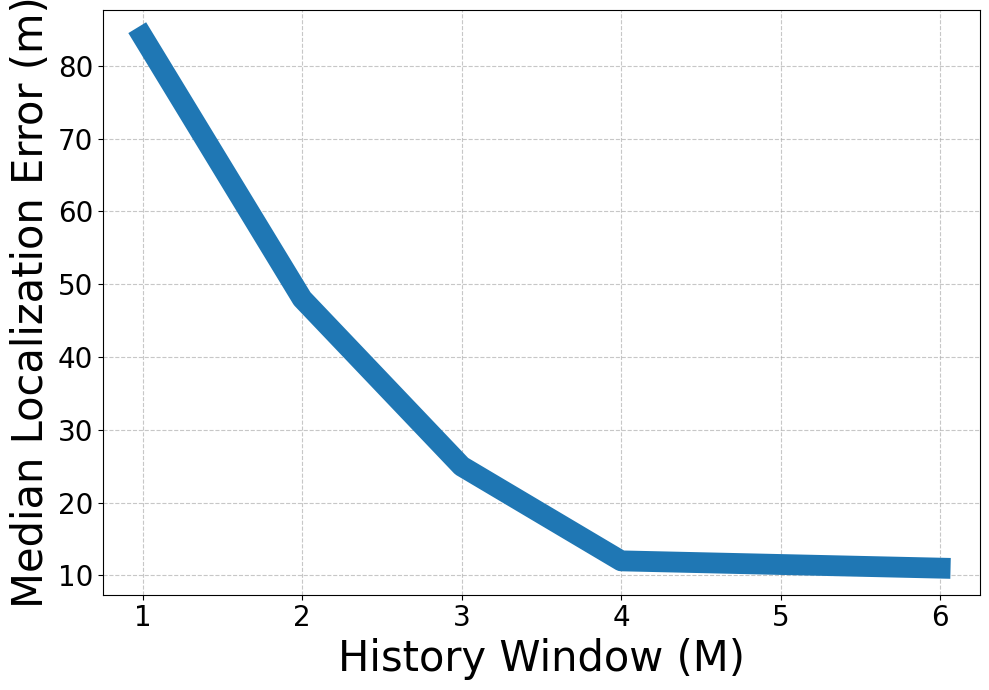

In [10]:
def draw_line_chart(x_values, y_values, title="Line Chart", x_label="X Axis", y_label="Y Axis", legend_label="Line"):
    plt.figure(figsize=(10, 7))
    plt.plot(x_values, y_values, linewidth=15, label=legend_label)

    plt.title(title, fontsize=30)
    plt.xlabel(x_label, fontsize=30)
    plt.ylabel(y_label, fontsize=30)

    # Set x-ticks from 1 to 5 with step 1
    plt.xticks(np.arange(1, 7, 1), fontsize=20)
    # plt.xlim(1,5)
    plt.yticks(fontsize=20)

    # plt.legend(fontsize=35)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig("window.pdf", format='pdf', bbox_inches='tight', dpi=300)
    plt.show()

x = [1, 2, 3, 4, 5, 6]
y = [84, 48, 25, 12, 11.5, 11]
draw_line_chart(x, y, "", "History Window (M)", "Median Localization Error (m)", "")


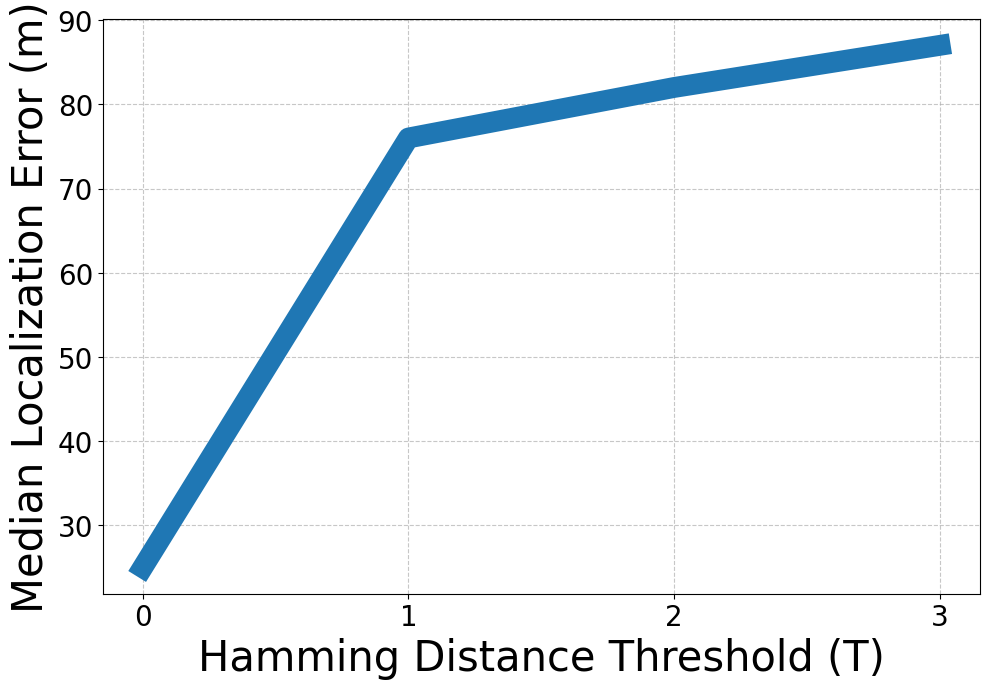

In [11]:
def draw_line_chart(x_values, y_values, title="Line Chart", x_label="X Axis", y_label="Y Axis", legend_label="Line"):
    plt.figure(figsize=(10, 7))
    plt.plot(x_values, y_values, linewidth=15, label=legend_label)

    plt.title(title, fontsize=30)
    plt.xlabel(x_label, fontsize=30)
    plt.ylabel(y_label, fontsize=30)

    # Set x-ticks from 1 to 5 with step 1
    plt.xticks(np.arange(0, 4, 1), fontsize=20)
    # plt.xlim(1,5)
    plt.yticks(fontsize=20)

    # plt.legend(fontsize=35)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig("threshold.pdf", format='pdf', bbox_inches='tight', dpi=300)
    plt.show()

x = [0, 1, 2, 3]
y = [25, 76, 82, 87]
draw_line_chart(x, y, "", "Hamming Distance Threshold (T)", "Median Localization Error (m)", "")


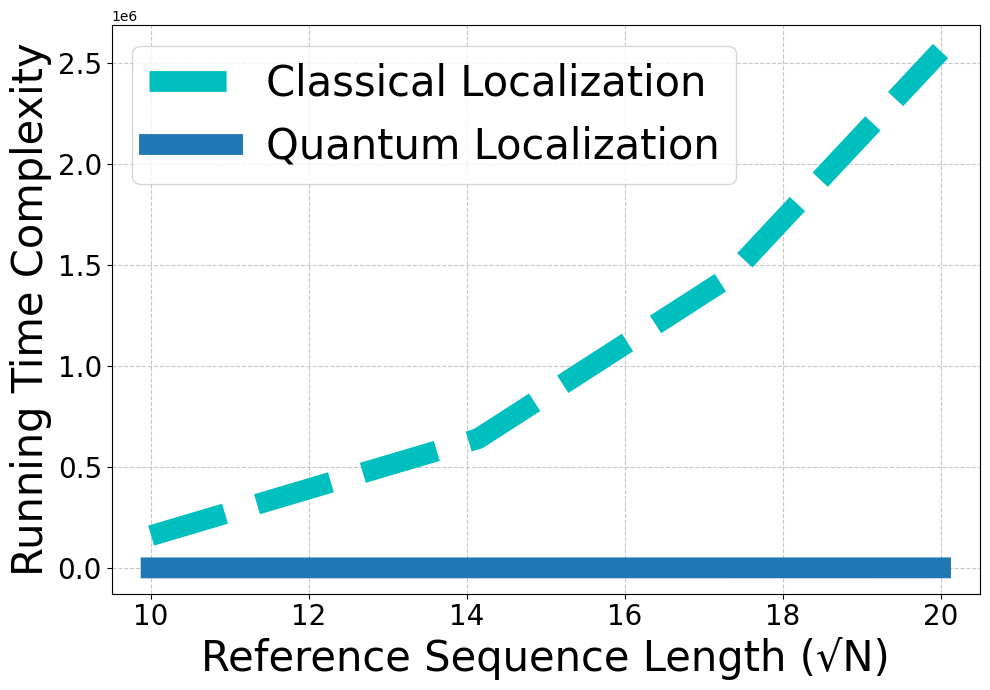

In [12]:
def draw_two_lines_chart(x_values, y1_values, y2_values, labels, title="Two Lines Comparison",
                        x_label="Reference Sequence Length (√N)", y_label="Running Time Complexity"):
    plt.figure(figsize=(10, 7))
    plt.plot(x_values, y1_values, 'c--', linewidth=15, label=labels[0])
    plt.plot(x_values, y2_values,linewidth=15, label=labels[1])

    # plt.title(title, fontsize=30)

    plt.xlabel(x_label, fontsize=30)
    plt.ylabel(y_label, fontsize=30)

    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    plt.legend(fontsize=30)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig("time.pdf", format='pdf', bbox_inches='tight', dpi=300)
    plt.show()


M2 = 16
x_ = [100, 200, 300, 400]
x = []
y2 = []
y = []
for e in x_:
    x.append(math.sqrt(e))
    y2.append(e**2 * M2)
    y.append(math.sqrt(e) * M2)



# y = [94, 134, 164, 189, 212]
# y2 = x * 4
draw_two_lines_chart(x, y2, y, ["Classical Localization", "Quantum Localization"], "Two Lines Comparison")


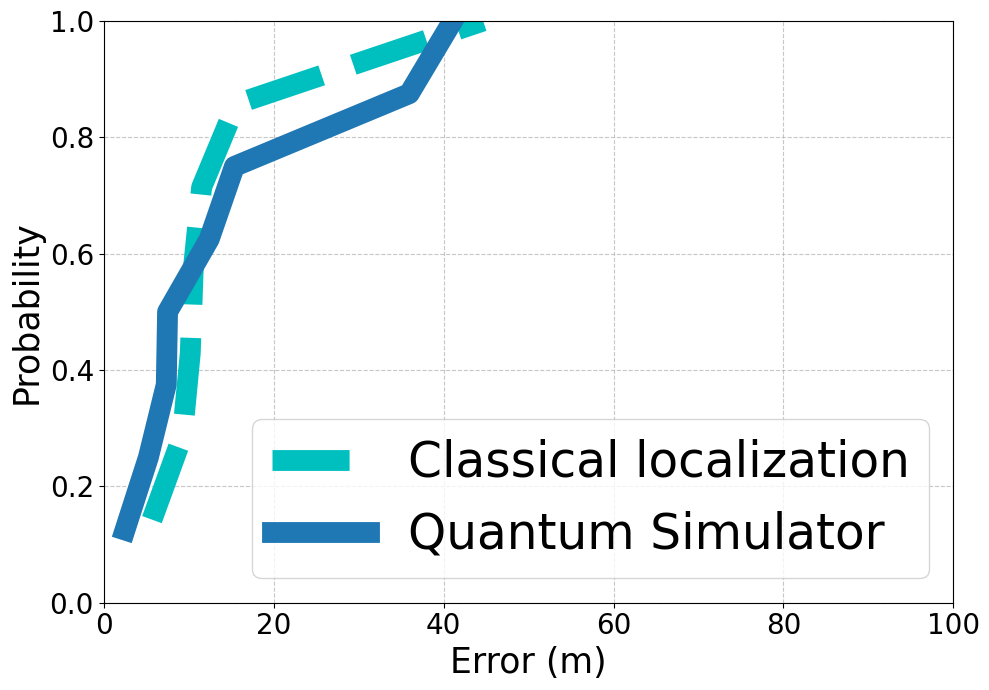

In [14]:
def draw_cdf_comparison(system1_data, system2_data, labels, title="CDF Comparison",
                        x_label="Error (m)", y_label="Probability"):
    plt.figure(figsize=(10, 7))

    # Sort data and calculate CDF
    sorted1 = np.sort(system1_data)
    cdf1 = np.arange(1, len(sorted1)+1) / len(sorted1)
    sorted2 = np.sort(system2_data)
    cdf2 = np.arange(1, len(sorted2)+1) / len(sorted2)

    plt.plot(sorted1, cdf1, 'c--', linewidth=15, label=labels[0])
    plt.plot(sorted2, cdf2, linewidth=15, label=labels[1])

    # plt.title(title, fontsize=30)
    plt.xlabel(x_label, fontsize=25)
    plt.ylabel(y_label, fontsize=25)

    plt.xticks(fontsize=20)
    plt.yticks(np.linspace(0, 1, 6), fontsize=20)

    plt.legend(fontsize=35, loc='lower right')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.ylim(0, 1)
    plt.xlim(0, 100)
    plt.tight_layout()
    plt.savefig("cdf.pdf", format='pdf', bbox_inches='tight', dpi=300)
    plt.show()


# try also simulator_real_error
draw_cdf_comparison(classical_errors, quantum_errors , ["Classical localization", "Quantum Simulator"])